# 10. Clustering

Acá va a ser donde todo el conocimiento que adquirimos hasta ahora se va a juntar. 

Lo que vamos a hacer es tratar de _clusterizar_ una colección de vectores en grupos o clústers de vectores que son los que estarán cerca unos de otros y todo a través de medir las distancias a pares. 

Supongamos que tenemos un grupo de $N$ $n$-vectores $x_{0},x_{1},\dots,x_{N-1}$. El objetivo de _clustering_ es agrupar (si es posible) en $k$ grupos los vectores tal que dentro de esos grupos estén lo más cerca posible unos de otros. 

![](fig1.png)

## 10.1 El objetivo de clustering

**Específicar el asignamiento de clúster**. Uno de los primeros problemas es asignar a una serie de vectores un clúster. Ahora, para empezar, vamos a partir teniendo las etiquetas $1,2,\dots,k$ que representan los clusters o grupos y estas etiquetas se las vamos a asignar a nuestros $N$ vectores usando al $N$-vector $c$, donde $c_{i}$ va a representar el grupo al que el vector $x_{i}$ está asignado. Por ejemplo, si $N=6$ y $k=3$, y además $c^{T} = [3,1,1,1,2,2]$ entonces esto significa que el vector $x_{0}$ quedará asignado al grupo $3$, los vectores $x_{1},x_{2},x_{3}$ estarán asignados al grupo $1$ y los vectores $x_{4},x_{5}$ quedarán asignados al grupo 2. Ahora, una forma alternativa de expresar esto es con conjuntos de los index de los vectores. Vamos a denotar como $G_{i}$ al grupo $i$ de indices de vectores que pertenecen a cada grupo. Continuando nuestro ejemplo entonces tenemos que

$$
G_{1} = \{1,2,3\}, \qquad G_{2} = \{4,5\}, \qquad G_{3} = \{0\}
$$

**Representativos de un grupo.** Ahora, consideremos de nuevo que tenemos $k$ grupos, a cada uno de estos grupos le vamos a asignar un vector representativo, el cual vamos a denotar por $z_{1},z_{2},\dots,z_{k}$. Estos vectores representativos pueden ser cualquier vector, no tience que ser necesariamente uno de los vectores dados sin embargo tiene que ser tal que la distancia de este $z_{i}$ a todos los otros vectores del grupo sea la mínima.

**Un objetivo de clustering.** Ahora bien, ya que definimos lo anterior podemos dar una métrica que nos ayude a juzgar la elección de un clúster en conjunto con los representativos de cada grupo. Definimos entonces:

$$
J^{clust} = (||x_{0}-z_{c_{1}}||^{2}+\cdots+||x_{N-1}-z_{c_{N}}||^{2})/N
$$

**Clustering óptimo y subóptimo.** Nosotros vamos a buscar un clustering, es decir, un asignamiento de cluster $c_{1},c_{2},\dots,c_{N}$ y vamos a elegir unos representativos $z_{1},z_{2},\dots,z_{N}$ que minimicen el objetivo $J^{clust}$. Al que nos retorne el $J^{clust}$ mínimo le vamos a llamar clustering óptimo. Aunque no existe tal solución lo que vamos a hacer es aproximarla por medio del algoritmo *k-means*, a esta solución le llamaremos *subóptima* y aunque no es solución exacta del problema es lo sufientemente buena para poder trabajar con ella. 

## 10.2 El algoritmo K-Means

**ALGORITMO** Algoritmo K-Means  
**iniciar** Se da una lista de $N$ vectores y una lista de $k$ vectores representativos $z_{1},z_{2},\dots,z_{k}$  

repetir hasta la convergencia:
1. *Parte los vectores en k-grupos*. Para cada vector $i=0,\dots,N-1$, asigna  $x_{i}$ a un grupo asociado con su representativo más cercano. 
2. *Actualiza los representativos de cada cluster*. Para cada grupo $1,\dots, k$ selecciona $z_{j}$ como el promedio de los vectores del grupo $j$.

![](it1.png)

![](it2.png)

![](it3.png)

![](it4.png)

![](it5.png)

**Ejemplo de Cluster**

In [1]:
# funcion que divide los puntos en grupos segun el centoride mas cercano
def group_assignment(data,centroids):
    # creamos un vector cero del tamaño de la data
    grouping_vec_c = np.zeros(len(data))
    # recorremos todos los datos
    for i in range(len(data)):
        # vector que contiene la distancia del punto respecto a los diferentes centroides
        dist = np.zeros(len(centroids))
        # calculamos las distancias
        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])
        # se obtiene la minima distancia con respecto a los centroides
        min_dist = min(dist)
        # se recorren los centroides y se asigna la distancia minima al punto en cuestion
        for j in range(len(centroids)):
            if min_dist == dist[j]:
                # guardamos el centroide asociado al punto en cuestion en el vector grouping
                grouping_vec_c[i] = j+1
    # retorna el vector grouping que contiene el centroide para cada punto de la data            
    return grouping_vec_c

In [2]:
# funcion que crea un nuevo centroide o vector representativo a partir de los puntos dados
# requiere la data de salida de group assignment
def update_centroid(data, grouping, centroids):
    # creamos una lista donde almacenaremos los nuevos centroides
    new_centroids = [];
    # recorremos los centroides
    for i in range(len(centroids)):
        # creamos un vector cero de la misma dimension de la data
        cent = np.zeros(len(data[0]))
        # variable que almacena la cantidad de puntos asociados a un centroide
        count = 0
        # recorremos la data
        for j in range(len(data)):
            # si el punto seleccionado pertenece al centroide dado, 
            # asignar el valor de centroide a cent y contar todos los puntos que pertenecen a ese grupo
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        # obtenemos el promedio del grupo
        group_average = cent/count
        # obtenemos un nuevo centroide a partir del promedio del grupo
        new_centroids.append(group_average)
    return new_centroids

In [11]:
# funcion que calcula las distancias entre los centroides y los puntos
def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj

In [9]:
#  funcion ensambladora
def Kmeans_alg(data, centroids):
    # contador de iteraciones hasta converger
    iteration = 0
    # lista para guardar la evolucion del cluster objetivo
    J_obj_vector = []
    # bandera para detener el algoritmo cuando converja
    Stop = False
    # recorrer la data
    while Stop == False:
        # Realiza primer paso del algoritmo
        grouping = group_assignment(data, centroids)
        # realiza segundo paso del algoritmo
        new_centroids = update_centroid(data, grouping, centroids)
        # calcula el cluster objetivo
        J_obj = clustering_objective(data, grouping,new_centroids)
        # agrega el cluster calculado a la lista
        J_obj_vector.append(J_obj)
        iteration += 1
        # Si los nuevos centroides distan menos de 1x10^-6 de los viejos salir del ciclo 
        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
            Stop = True
        else:
            # si es mayor se asigna el centroide calculado como nuevo centroide
            centroids = new_centroids
    return new_centroids, grouping, J_obj_vector, iteration

In [5]:
import matplotlib.pyplot as plt
import numpy as np

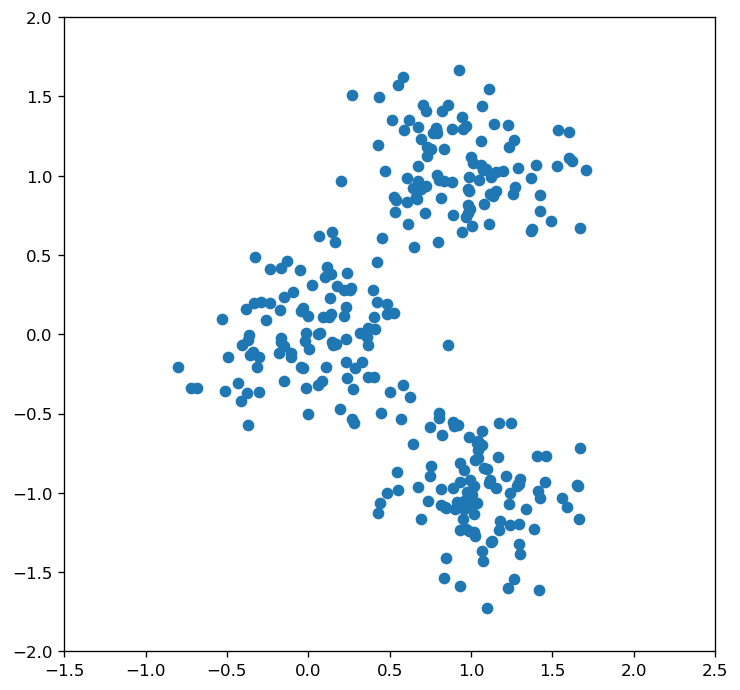

In [8]:
# grafico de puntos aleatorios en diferentes rangos para crear los cluster
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],\
                    [[1,1] + 0.3*np.random.randn(2) for i in range(100)], \
                    [[1,-1]+ 0.3* np.random.randn(2) for i in range(100)]])
ax.scatter( X[:,0],X[:,1])
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.show()

La grafica nos muestra que los centroides iniciales estan en: (0,0), (1,1) y (1,-1) tal como esperabamos

In [15]:
# corremos el algoritmo para los primeros tres elementos de X
A = Kmeans_alg(X,X[:3])

In [16]:
# longitud de A
len(A)

4

In [17]:
# vectores representativos o centroides
A[0]

[array([ 0.02575961, -0.00859655]),
 array([0.93913318, 1.05115993]),
 array([ 1.05375457, -1.00291671])]

In [19]:
# la cantidad de iteraciones corresponde al valor del ultimo elemento de A
A

([array([ 0.02575961, -0.00859655]),
  array([0.93913318, 1.05115993]),
  array([ 1.05375457, -1.00291671])],
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.

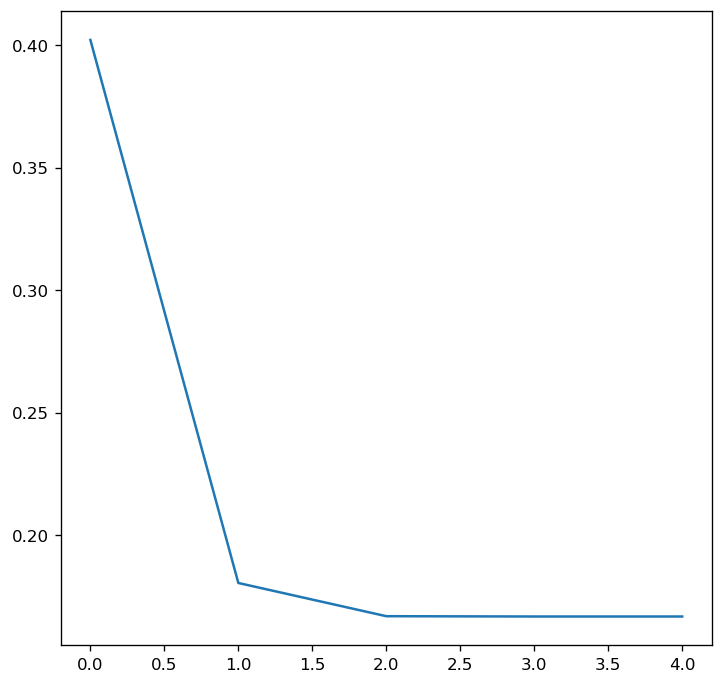

In [20]:
# visualizacion de la evolucion de los centroides
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(list(range(A[-1])),A[2])
plt.show()

Vemos como el centroide va disminuyendo hasta que se estabiliza sobre un valor

**Diferenciar los Cluster**

In [25]:
# Utilizamos los valores del array A[1]
A[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [24]:
# Creamos 3 listas donde almacenamos la posicion en las que estan los cluster 1,2 y 3
G_1, G_2, G_3 = [], [], []

In [26]:
# recorremos el array y vamos guardando las posiciones en las listas indicadas
for i in range(len(A[1])):
    if A[1][i] == 1:
        G_1.append(i)
    elif A[1][i] == 2:
        G_2.append(i)
    elif A[1][i] == 3:
        G_3.append(i)

In [29]:
# separamos los datos para poder graficarlos

# valores de x de los datos G_1
X_1 = [X[:,0][G_1][i] for i in range(len(G_1))]
# valores de y de los datos G_1
Y_1 = [X[:,1][G_1][i] for i in range(len(G_1))]

# valores de x de los datos G_2
X_2 = [X[:,0][G_2][i] for i in range(len(G_2))]
# valores de y de los datos G_2
Y_2 = [X[:,1][G_2][i] for i in range(len(G_2))]

# valores de x de los datos G_1
X_3 = [X[:,0][G_3][i] for i in range(len(G_3))]
# valores de y de los datos G_1
Y_3 = [X[:,1][G_3][i] for i in range(len(G_3))]

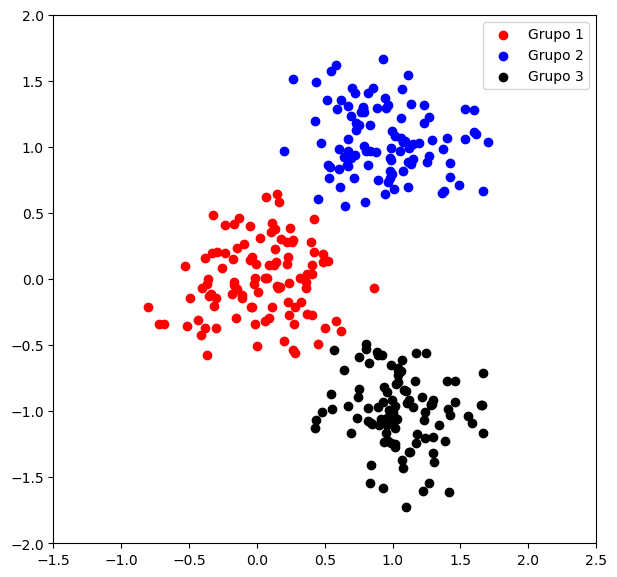

In [30]:
# Grafico de los cluster
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=100)

ax.scatter( X_1, Y_1, color='red', label='Grupo 1')
ax.scatter( X_2, Y_2, color='blue', label='Grupo 2')
ax.scatter( X_3, Y_3, color='black', label='Grupo 3')
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.legend()
plt.show()

In [21]:
from sklearn.datasets import fetch_openml
import random

In [40]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [51]:
A = Kmeans_alg(X,random.choices(X,k=9))

In [52]:
import itertools

In [53]:
a = list(itertools.product(list(range(3)),list(range(3))))

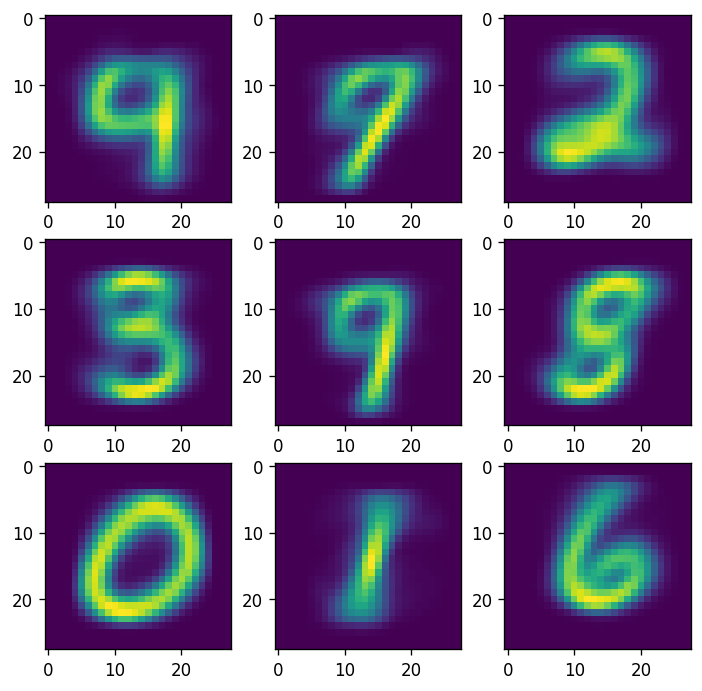

In [54]:
fig, ax = plt.subplots(3,3,figsize=(7,7),dpi=120)
for i,j in zip(a,A[0]):
        ax[i[0]][i[1]].imshow(j.reshape(28,28))
plt.show()

In [7]:
from sklearn.datasets import fetch_openml, load_breast_cancer
import random

In [57]:
A = load_breast_cancer()

In [59]:
len(A.data[0])

30

In [60]:
X = Kmeans_alg(A.data,A.data[:2])

In [64]:
from collections import Counter

In [65]:
Counter(X[1])

Counter({2.0: 131, 1.0: 438})

In [31]:
from matplotlib.image import imread

In [ ]:
from matplotlib.image import imread
# define location of dataset
folder = 'data_set_prob_1/'
# plot first few images
for i in range(9):
	# define subplot
	# define filename
	filename = folder + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()


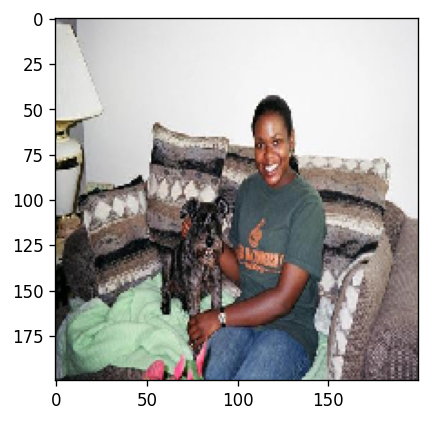

In [48]:
fig,ax = plt.subplots(1,1,dpi=120)
ax.imshow(Data[59])
plt.show()

In [36]:
x = imread('data_set_prob_1/1.jpg')

In [52]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [53]:
Data = []
for i in range(60):
    Data.append(img_to_array(load_img('data_set_prob_1/'+str(i)+'.jpg',target_size=(200, 200))))

In [56]:
Data[1].shape

(200, 200, 3)

In [49]:
Kmeans_alg(Data,Data[:2])

TypeError: unsupported operand type(s) for -: 'Image' and 'Image'